<a href="https://colab.research.google.com/github/putricha/college-machine-learning/blob/main/TugasPraktikumJS7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Putri Norchasana**

**Kelas : TI-3D**

Tugas Praktikum Jobsheet 7

**Soal Praktikum**

Buatlah sebuah model K-Means dengan ketentuan,

Gunakan data 'Mall_Customers.csv'

Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

Buatlah model K-Means dengan mempertimbangkan jumlah
k
k yang terbaik.

Buatlah  implementasi model SOM untuk segmentasi citra lain

In [1]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/ML/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [3]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [4]:
df = df.drop(['CustomerID', 'Gender', 'Age'], axis=1)
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


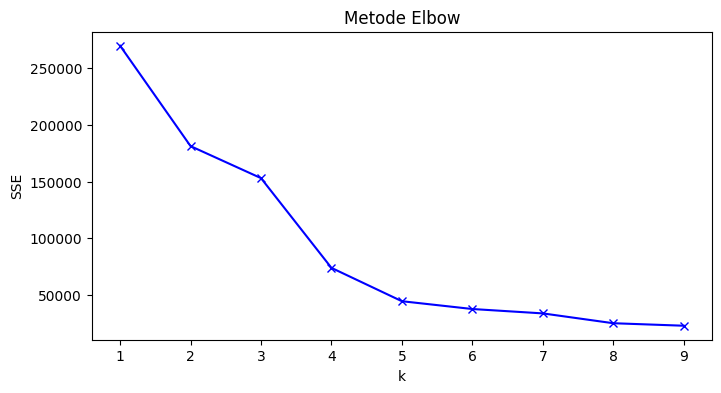

In [5]:

X = df

sse = []

K = range(1,10)

for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow")
plt.show()

**Modeling**

In [6]:
km_model = KMeans(n_clusters=5)
km_model.fit(X)
y_kmeans = km_model.predict(X)
df["label"] = y_kmeans

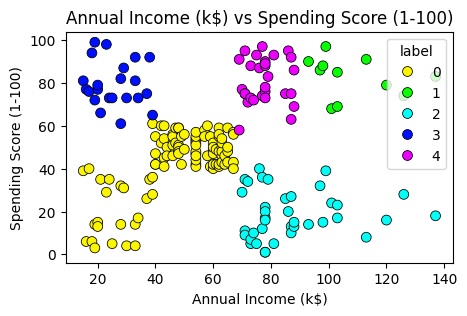

In [8]:
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='label', data=df, palette=sns.color_palette("hsv", n_colors=5), s=50, edgecolor='k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()

**Model SOM**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [10]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [15]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")

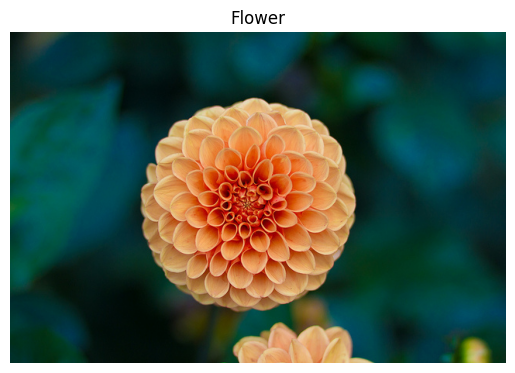

In [16]:
# Display gambar
plt.imshow(flower)
plt.axis('off')
plt.title('Flower')
plt.show()

In [17]:
num_epochs = 20
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(flower, num_epochs, initial_learning_rate, initial_neighborhood_radius)

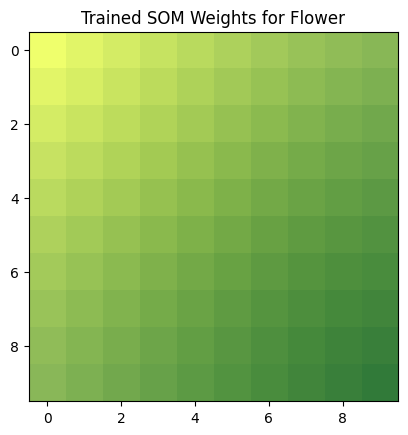

In [18]:
# Assuming trained_weights contains float data that needs normalization
trained_weights_normalized = trained_weights / np.max(trained_weights)  # Normalize to range [0, 1]

plt.imshow(trained_weights_normalized)
plt.title('Trained SOM Weights for Flower')
plt.show()